# Regresión logística para predicciones bancarias

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../../datasets/bank/bank.csv", sep = ";")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [3]:
data.shape

(4119, 21)

In [4]:
list(data.columns.values)

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [5]:
data["y"] = (data["y"] == "yes").astype(int)

In [6]:
data["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [7]:
data["education"] = np.where(data["education"] == "basic.4y", "Basic", data["education"])
data["education"] = np.where(data["education"] == "basic.6y", "Basic", data["education"])
data["education"] = np.where(data["education"] == "basic.9y", "Basic", data["education"])

data["education"] = np.where(data["education"] == "high.school", "High School", data["education"])
data["education"] = np.where(data["education"] == "professional.course", "Professional course", data["education"])
data["education"] = np.where(data["education"] == "university.degree", "University degree", data["education"])

data["education"] = np.where(data["education"] == "illiterate", "Illiterate", data["education"])
data["education"] = np.where(data["education"] == "unknown", "Unknown", data["education"])


In [8]:
data["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [9]:
data.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [10]:
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


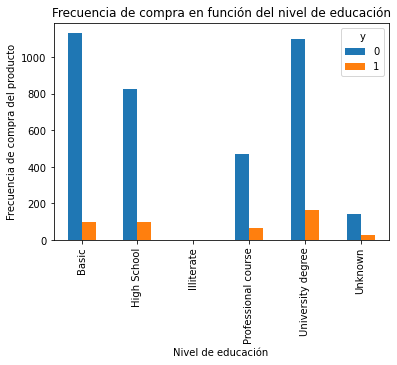

In [11]:
pd.crosstab(data["education"], data["y"]).plot(kind = "bar")
plt.title("Frecuencia de compra en función del nivel de educación")
plt.xlabel("Nivel de educación")
plt.ylabel("Frecuencia de compra del producto")
plt.show()

Text(0, 0.5, 'Proporción de clientes')

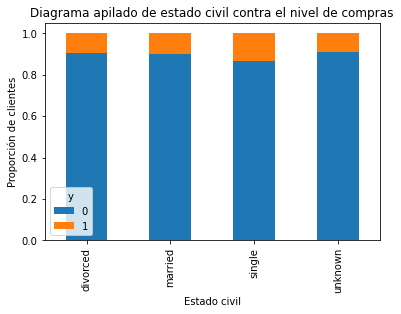

In [12]:
table = pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis = 0). plot(kind = "bar", stacked = True)
plt.title("Diagrama apilado de estado civil contra el nivel de compras")
plt.xlabel("Estado civil")
plt.ylabel("Proporción de clientes")

In [13]:
data.day_of_week = pd.Categorical(data.day_of_week, 
                                  ['mon','tue','wed','thu','fri'],
                                  ordered = True)

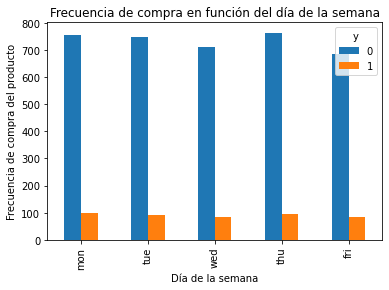

In [14]:
pd.crosstab(data["day_of_week"], data["y"]).plot(kind = "bar")
plt.title("Frecuencia de compra en función del día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Frecuencia de compra del producto")
plt.show()

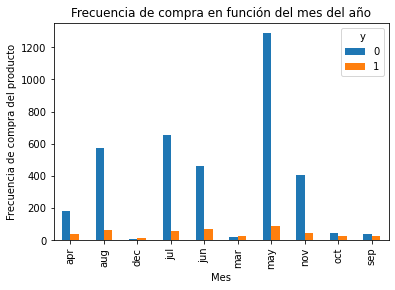

In [15]:
pd.crosstab(data["month"], data["y"]).plot(kind = "bar")
plt.title("Frecuencia de compra en función del mes del año")
plt.xlabel("Mes")
plt.ylabel("Frecuencia de compra del producto")
plt.show()

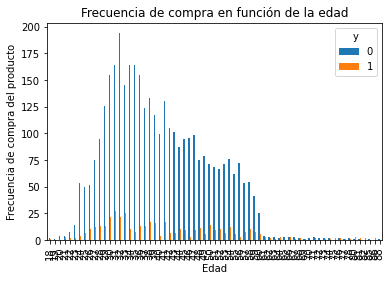

In [16]:
pd.crosstab(data["age"], data["y"]).plot(kind = "bar")
plt.title("Frecuencia de compra en función de la edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia de compra del producto")
plt.show()

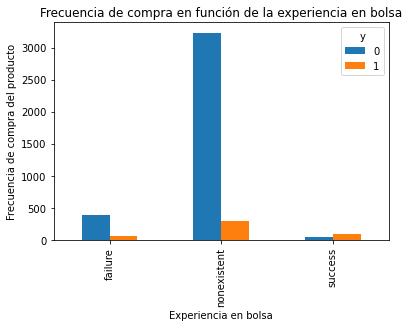

In [17]:
pd.crosstab(data["poutcome"], data["y"]).plot(kind = "bar")
plt.title("Frecuencia de compra en función de la experiencia en bolsa")
plt.xlabel("Experiencia en bolsa")
plt.ylabel("Frecuencia de compra del producto")
plt.show()

## Conversión de las variables categóricas a *dummies*

In [18]:
categoric = ["job","marital", "education", "default", "housing", "loan", "contact",
             "month", "day_of_week", "poutcome"]

for cat in categoric:
    cat_list = "cat" + "_" + cat
    cat_dummies =  pd.get_dummies(data[cat], prefix = cat_list)
    data_new    = data.join(cat_dummies)
    data        = data_new

In [19]:
data_vars = list(data.columns.values)

In [20]:
to_keep = [v for v in data_vars if v not in categoric]

In [21]:
bank_data = data[to_keep]

In [22]:
bank_data_vars = list(bank_data.columns.values)
Y = ['y']
X = [v for v in bank_data_vars if v not in Y]

## Selección de rasgos para el modelo

In [23]:
n = 12

In [24]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [25]:
lr = LogisticRegression(solver="liblinear")

In [26]:
rfe = RFE(lr,n)
rfe = rfe.fit(bank_data[X], bank_data[Y].values.ravel())

/home/mauricio/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=12 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [27]:
vars_filtered = rfe.support_

In [28]:
final_vars = list(np.array(X)[vars_filtered])

In [29]:
X_final = bank_data[final_vars]
Y_final = bank_data["y"]

## Implementación del modelo en Python con *statsmodel*

In [30]:
import statsmodels.api as sm

In [31]:
logit_model = sm.Logit(Y_final, X_final)

In [32]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.279180
         Iterations 7


In [33]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                Logit             Pseudo R-squared:  0.192      
Dependent Variable:   y                 AIC:               2323.8813  
Date:                 2022-01-30 15:17  BIC:               2399.7617  
No. Observations:     4119              Log-Likelihood:    -1149.9    
Df Model:             11                LL-Null:           -1422.9    
Df Residuals:         4107              LLR p-value:       4.9751e-110
Converged:            1.0000            Scale:             1.0000     
No. Iterations:       7.0000                                          
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
previous               0.3493   0.1411   2.4750 0.0133  0.0727  0.6258
euribor3m             -0.6253   0.0265 -23.6151 0.0000 -0.6772 -0.5734
cat_job_entrepreneur  -0.4842   0.3817  -1.2685 0.2046 -1.2323  0.2639
cat_job_self-employed -0.4626   0.3275  -1.4125 0.1578 -1.1046  0.1793
cat_month_dec          0.7147   0.4662   1.5331 0.1253 -0.1990  1.6284
cat_month_jul          0.3280   0.1842   1.7808 0.0750 -0.0330  0.6889
cat_month_jun          0.3431   0.1689   2.0310 0.0423  0.0120  0.6741
cat_month_mar          1.0612   0.3152   3.3666 0.0008  0.4434  1.6789
cat_month_may         -1.0490   0.1264  -8.3016 0.0000 -1.2967 -0.8014
cat_month_oct          0.0707   0.2699   0.2621 0.7932 -0.4583  0.5997
cat_poutcome_failure  -1.0450   0.2453  -4.2601 0.0000 -1.5257 -0.5642
cat_poutcome_success   0.7788   0.2888   2.6967 0.0070  0.2128  1.3449
======================================================================

"""

## Implementación con Scikit-learn

In [34]:
from sklearn import linear_model

In [35]:
logit_model = linear_model.LogisticRegression()
logit_model.fit(X_final, Y_final)

LogisticRegression()

In [36]:
logit_model.score(X_final, Y_final)

0.9021607186210245

In [37]:
1-Y_final.mean()

0.8905074047098811

In [38]:
pd.DataFrame(zip(X_final.columns, np.transpose(logit_model.coef_)))

,0,1
0,previous,[0.3806182565226029]
1,euribor3m,[-0.5003233622071052]
2,cat_job_entrepreneur,[-0.34146450802004114]
3,cat_job_self-employed,[-0.3336387311660442]
4,cat_month_dec,[0.8795757016407632]
5,cat_month_jul,[0.3834519218058039]
6,cat_month_jun,[0.5132745842268023]
7,cat_month_mar,[1.2768727355031537]
8,cat_month_may,[-0.7371984274746102]
9,cat_month_oct,[0.4189996194611293]


## Validación del modelo logístico

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X_final,Y_final, test_size = 0.3, random_state = 0)

In [41]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

LogisticRegression()

$$ y_k = \begin{cases} 0 \ , \ \text{si} \ p_k\leq 0.5\\
1 \ , \ \text{si} \ p_k > 0.5\end{cases}$$

In [42]:
probs = lm.predict_proba(X_test)

In [43]:
prediction = lm.predict(X_test) # Predicción con p = 0.5

In [44]:
prob = probs[:,0]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0] > threshold, 1, 0)
prob_df.head()

,0,prediction
0,0.933288,1
1,0.883022,1
2,0.930183,1
3,0.937254,1
4,0.935108,1


In [45]:
pd.crosstab(prob_df.prediction, columns = "count")

col_0,count
prediction,
0,3
1,1233


In [46]:
1233/len(prob_df)*100

99.75728155339806

In [47]:
from sklearn import metrics

In [48]:
metrics.accuracy_score(Y_test, prediction) # Coincidencia entre predicciones.

0.9021035598705501

## Cross-validation

In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
scores = cross_val_score(linear_model.LogisticRegression(), X_final, Y_final, scoring = "accuracy", cv = 10)

In [51]:
np.mean(scores)

0.9019175347837383

## Matrices de confusión y curvas ROC

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X_final,Y_final, test_size = 0.3, random_state = 0)

In [53]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

LogisticRegression()

In [54]:
probs = lm.predict_proba(X_test)

In [61]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0]>= threshold, 1, 0)
prob_df["actual"] = list(Y_test)
prob_df.head()

,0,prediction,actual
0,0.066712,0,0
1,0.116978,1,0
2,0.069817,0,0
3,0.062746,0,0
4,0.064892,0,0


In [66]:
confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
TN = confusion_matrix[0][0]
TP = confusion_matrix[1][1]
FN = confusion_matrix[0][1]
FP = confusion_matrix[1][0]

In [68]:
confusion_matrix

actual,0,1
prediction,,
0,847,46
1,267,76


In [70]:
sens = TP/(TP + FN)
espc_1 = 1 - (TN/(TN+FP))

(sens, espc_1)

(0.22157434402332363, 0.05151175811870101)

In [117]:
threshold = list(np.array(range(20,940))*0.001)
sensib    = []
espefcs_1 = []

for t in threshold:
    prob_df["prediction"] = np.where(prob_df[0]>= t, 1, 0)
    prob_df["actual"] = list(Y_test)

    confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
    TN = confusion_matrix[0][0]
    TP = confusion_matrix[1][1]
    FP = confusion_matrix[0][1]
    FN = confusion_matrix[1][0]

    sens = TP/(TP + FN)
    sensib.append(sens)
    espc_1 = 1 - (TN/(TN+FP))
    espefcs_1.append(espc_1)

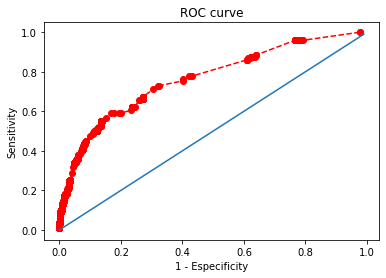

In [134]:
plt.plot(espefcs_1, sensib, marker = "o", linestyle = "--", color = "r")
x = [i*0.01 for i in range(100)]
y = [i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel("1 - Especificity")
plt.ylabel("Sensitivity")
plt.title("ROC curve")
plt.show()

In [122]:
espc_1, sensit, _ = metrics.roc_curve(Y_test, prob)

In [127]:
df = pd.DataFrame({
    "x": espc_1,
    "y": sensit
})


,x,y
0,0.000000,0.000000
1,0.000000,0.008197
2,0.000000,0.032787
3,0.000898,0.032787
4,0.000898,0.057377


In [136]:
auc = metrics.auc(espc_1, sensit)
auc

0.7645502840156576